<a href="https://colab.research.google.com/github/Tatsuya28/IT41-project/blob/main/IT41_RSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IT41 project: RSA Cryptosystem**

Authors: 
+ Hakan ERASLAN
+ Thomas FRIDBLATT
+ Jérémie KIMENAU
+ Eliséo VARDANEGA

## **Context**

The RSA cryptography system was invented in 1977 by three mathematicians: Ronald Rivest, Adi Shamir and Leonard Adleman.  
RSA is an asynchronous encryption algorithm that we still use a lot in our current systems because of its efficiency and its resistance against hacking (except quantum computing).
These three mathematicians wanted to demonstrate that asynchronous cryptography couldn’t work, and they ended up creating RSA, an algorithm based on that principle, that is still largely used nowadays (we estimate that approximatively 300 million programs use the RSA algorithm).

<br/>

RSA is using the benefits of modular calculations and the difficulty of factoring large prime numbers to find the prime factors necessary to decode the algorithm, which makes it safe to use even in critical systems. It is also relatively easy to understand and to use because it uses simple arithmetic calculus.
However, we can find some disadvantages, one of which are the large prime numbers to find (in principle more than 512 bits long by today's standards) for RSA to be secure.

<br/>

How does RSA work ?

```
1) Choose 2 very large prime numbers P and Q
2) Compute n = PQ
3) Compute φ(n) = (p - 1)(q - 1) (Euler's totient function)
4) Choose a prime number e such that e is coprime with φ(n)
5) Calculate d such that it satifies the congruence : d.e  ≡ 1 mod n
```
<br/>

In RSA, each recipient has 2 different keys used for secure communications:

*   A public key used by others to send him an encrypted message which consists of n and e
*   A private key made of P, Q and d for him to decrypt the messages he receives


<br/>


Take Bob and Alice, how do they use these keys to encrypt and decrypt their messages ?

- Bob sends his public key ($e_{b}, n_{b}$) to Alice and keeps his private key ($d_{b}, p_{b}, q_{b}$)
- Alice sends her public key ($e_{a}, n_{a}$) to Bob and keeps her private key ($d_{a}, p_{a}, q_{a}$)

<br/>


1.   Bob wants to send the message `Please, give me the answers of the Spring 2023 IT41 Midterm exam !` to Alice and wants to make sure it is secret and only Alice can decrypt the message.  
Bob converts the message to its numerical equivalent and calls it `X`. Then he calculates the encrypted message `Y` by using the public key of Alice.

\begin{equation*}
Y = X^{e_{a}} \mod{n_{a}}
\end{equation*}

2. Alice receives the message from Bob. She uses her private key, that she and only she knows to decrypt `Y` and get the initial message `X`.

\begin{equation*}
X = Y^{d_{a}} \mod{n_{a}}
\end{equation*}

<br/>

Now, we take Eve who wants to know what Bob told Alice, what would happen if she was able to spy on their communication and also read the message `Y` ?

RSA is an encryption that is difficult to brake so Eve will have a really hard time finding `X`.  

This is beacuse RSA is based on the fact that finding $d_{a}$ using `Y` is a difficult very difficult operation. It would require factoring  $n_{a}$ as the product of two prime numbers which is nearly impossible when working with very huge numbers (512 bits long today).  

This problem is also known as the discrete logarithm problem and it is believed to be computationally infeasible as there is no known algorithm that can solve it in polynomial time.



## **1. How to compute large primes ?**



The first approach uses the definition of what a prime number is : `a whole number greater than 1 that cannot be divided by any whole number other than itself and 1` ( 2, 3, 5, 7, 11 etc...).

<br />

We can use the "Sieve of Eratosthenes", a Greek mathematician from 2nd century BC, to generate a list of prime numbers.  
In our case, we do not need a list, but simply two single prime numbers.

<br />


One could proceed like this to generate a random prime number:


*   Pick a random number n (bigger than $10^{60}$)
*   Check every odd number from 3 to $\sqrt{n}$ and check if it divides n. 






In [ ]:
import random
import math


def is_prime(n):
    """Checks if n is a prime number"""
    if n == 2 or n == 3:
        return True
    if n < 2 or n % 2 == 0:
        return False
    for i in range(3, int(math.sqrt(n)) + 1, 2):
        if n % i == 0:
            return False
    return True

def generate_prime(n_digits):
    """Generates random numbers between 10^n_digits and 10^(n_digits+1) and returns it if it is prime"""
    while True:
        n = random.randint(10**n_digits, 10**(n_digits+1))
        if is_prime(n):
            return n


We can very easily check that `is_prime(n)` is linear with respect to `√n`, namely `T(is_prime(n)) ∈ O(√n)`. The `generate_prime()` function's complexity would be at best `O(√n)` if the first number picked is prime. The average and worst complexity is `O(s√n)` where `s` corresponds to the amount of numbers picked that were not prime.

</br>

Now, imagine that the computer can run `N` operations per second. Assuming $N = 10^{9}$, how fast could could it generate a prime number in the best-case scenario ?

</br>


\begin{align*}
\text{generate_prime} \in \mathcal{O}(\sqrt{n}) &\Leftrightarrow T(\text{generate_prime}(N)) \leq c\sqrt{N} \\
&\Leftrightarrow c = \frac{T(\text{generate_prime}(N))}{\sqrt{N}} \\
&T(\text{generate_prime}(n)) = \frac{T(\text{generate_prime}(N))}{\sqrt{N}} \times \sqrt{n} \\
&\Leftrightarrow T(\text{generate_prime}(n)) = \frac{1}{10^9} \times \sqrt{10^{60}} = 10^{21} \text{s} \approx 317{,}097{,}919{,}837{,}646 \text{ years}
\end{align*}

</br>

This is equal to 23145 times the age of the universe so this clearly is not a viable strategy to generate a prime number this big.  

</br>

This is where Pierre de Fermat, a lawyer and French mathematician of the 17th century comes into play.

What we are interested in is `Fermat's little theorem` which states that for any given integer $a$, if $p$ is prime, then the following statement is true:
$$a^{p-1} \equiv 1 \pmod{p}$$


</br>


This primality test is used to generate prime numbers. However, it can also give us numbers that are called `pseudo-prime` numbers.  
Pseudo-prime numbers are numbers that behave similarly to prime numbers with respect to certain tests. Because we only need prime numbers for RSA, we can  eliminate pseudo-primes by using multiple tests where for example we check if the generated number satisfies Fermat's little theorem for different values of the base a.


</br>
  
In python, we can use the following code to implement this approach with a = 2 and a = 3. It uses a naive and unoptimized way of calculating a^n. We will see later that it causes performance issues.


In [ ]:
#Naive powering algorithm
def power(a,n):
    res = 1
    for i in range(n):
        res = res*a
    return res

def generate_prime_little_Fermat(n_digits):
    a1 = 2
    a2 = 3
    while True:
        p = random.randint(10**n_digits, 10**(n_digits+1)) #Generate a random integer between min and max
        if (power(a1,p-1)%p)==(power(a2,p-1)%p)==1: #We check that a^(p-1) is equal to 1 mod p
            return p

Technically, this is the required algorithm. However, if p is a huge number ($p >{10^{60}}$), the computer cannot run the calculations as `a^(p-1)` would be excruciatingly long to compute.

</br>

Instead of using `power(a,p-1)%p` to check if $a^{p-1} \equiv 1 \mod{p}$, we can use what is called the `Right-to-left binary method` described by Bruce Schneier in 1993 in *Applied Cryptography*.  

The algorithm works as follows:

*   Convert the exponent to binary representation.
*   Start with the least significant bit of the binary representation.
*   If the current bit is 1, multiply the result by the base and take the result modulo the modulus.
*   Square the base and take the result modulo the modulus.
*   Move to the next bit in the binary representation.
*   Repeat steps 3-5 until all bits have been processed.

In [ ]:
def pow_mod(x, y, z):
    number = 1
    while y != 0:
        if y % 2 == 1: #Check the least significant bit of the binary representation.
            number = (number*x)%z
        y = y // 2 #Shift to the next bit by integer division.
        x = (x*x)%z
    return number

Let's prove the correctness of this algorithm:

------------Algorithm Convergence-------------
1. The function `pow_mod(x, y, z)` returns an integer between 0 and z-1, inclusive, for any non-zero values of x, y, and z. This is because during the calculations, the variable `number` is always an integer between 1 and z-1, inclusive, since we calculate products modulo z.

2. The `while` loop terminates after a finite number of iterations. This is because at each iteration, the variable y is divided by 2 using integer division, so y strictly decreases until it reaches 0.

------------Loop Invariant-------------

`Initialization:`</br>
For y = 0, we do not enter the loop, mod_pow(x,y,z) = 1 and x^0 mod z = 1, so it is correct.  
For y = 1, we enter the loop, mod_pow(x,1,z) = x mod z = x^1 mod z = x mod z, which is also correct.  
For y = 2, we enter the loop, $(x,2,z) = (x\ mod\ z)*x\ mod\ z = x * x\ mod\ z = x^2\ mod\ z$, which is also correct (ac mod n = bc mod n, multiplication works in modular arithmetic).

</br>

`Induction hypothesis:` </br>
mod_pow(x,k,z) = x^k mod z
Assuming the property is true for k, let us show that it is true for k+1:
Two cases:

</br>


* If $k+1$ is even: $k+1=2j$, then

\begin{align*}
\text{mod_pow}(x,k+1,z) &= \text{mod_pow}(x,2j,z) \\
&\stackrel{IH}{=} (x^{2j}) \bmod z \\
&= (x^j)^2 \bmod z \\
&= (x^j \bmod z)^2 \bmod z \\
&= \text{mod_pow}(x,j,z)^2 \bmod z \\
&= \text{mod_pow}(\text{mod_pow}(x,j,z),2,z).
\end{align*}

</br>

And then we have mod_pow(x,j,z) correctly calculated for j = 0 to k and mod_pow(mod_pow(x,j,z),2,z) correctly calculated too according to the initialization.

</br>

If $k+1$ is odd: $k+1=2j+1$, then
\begin{align*}
\text{mod_pow}(x,k+1,z) &= \text{mod_pow}(x,2j+1,z) \\
&\stackrel{IH}{=} x^{2j+1} \bmod z \\
&= (x^{2j} \bmod z) \cdot x \bmod z \\
&= (((x^j \bmod z)^2 \bmod z) \cdot x \bmod z) \\
&= \text{mod_pow}(\text{mod_pow}(x,j,z),2,z) \cdot x \bmod z.
\end{align*}

</br>

Here, we again have $\text{mod_pow}(\text{mod_pow}(x,j,z),2,z)$ calculated correctly for the same reasons as before. We just need to show that $\text{mod_pow}(\text{mod_pow}(x,j,z),2,z) \cdot x \bmod z$ is also correctly calculated. 

Since multiplication works in modular arithmetic, we have
\begin{align*}
\text{mod_pow}(\text{mod_pow}(x,j,z),2,z) \cdot x \bmod z = \text{mod_pow}(\text{mod_pow}(x,j,z),2,z) \cdot \text{mod_pow}(x,1,z) \
&= \text{mod_pow}(\text{mod_pow}(x,j,z) \cdot x, 1, z).
\end{align*}

This is also correctly calculated according to the initialization. Therefore, the property holds for all $y \in \mathbb{N}$.

</br>

Therefore, the property is true for all y in $\mathbb{N}$.

-------------------------

What is the complexity of the algorithm ?

The while loop stops when y = 0. Each iteration, y is divided (using integer division) by 2 and because y is an integer, it will reach 0 at some point.
From this we conclude that the algorithm is logarithmic with respect to the exponent y. $ T(pow\_mod) ∈ Θ(log(y)) $.

-------------------------

By using the fast modular exponentiation and Fermat's Little Theorem, we can rewrite our final algorithm as:

In [ ]:
def generate_prime_little_Fermat_pow_mod(n_digits):
    a_values = [2,3,5,7,11] #Adding many tests so that we can eliminate pseudo-primes
    while True:
        p = random.randint(10**n_digits, 10**(n_digits+1))
        for k in a_values:
          if not(pow_mod(k,p-1,p)==1):
            continue
          else:
            return p

Let's benchmark the function that uses Fermat's Little Theorem to see how efficient it is:

Size of the generated prime 10^0: Naive generation time: 0.000026, Little Fermat time: 0.000021, Little Fermat with fast modular exponentiation: 0.000005
Size of the generated prime 10^1: Naive generation time: 0.000022, Little Fermat time: 0.000035, Little Fermat with fast modular exponentiation: 0.000014
Size of the generated prime 10^2: Naive generation time: 0.000042, Little Fermat time: 0.001091, Little Fermat with fast modular exponentiation: 0.000067
Size of the generated prime 10^3: Naive generation time: 0.000015, Little Fermat time: 0.019016, Little Fermat with fast modular exponentiation: 0.000087
Size of the generated prime 10^4: Naive generation time: 0.000051, Little Fermat time: 1.297548, Little Fermat with fast modular exponentiation: 0.000938
Size of the generated prime 10^5: Naive generation time: 0.000076, Little Fermat time: 1.297548, Little Fermat with fast modular exponentiation: 0.000596
Size of the generated prime 10^6: Naive generation time: 0.000121, Little Fe

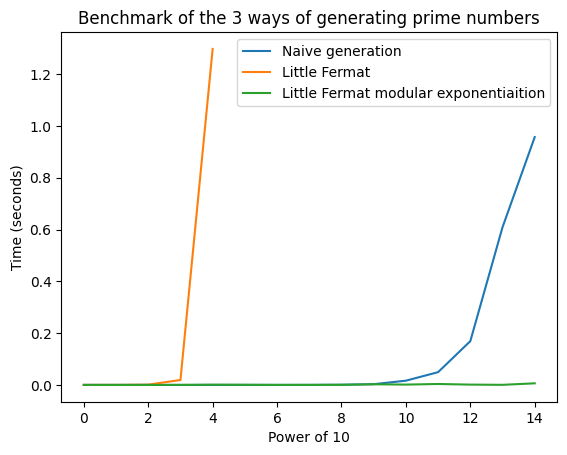

In [ ]:
import matplotlib.pyplot as plt
import time 

# Benchmark of the three functions to generate prime numbers
naive_generation = []
little_Fermat = []
little_Fermat_pow_mod = []

for number in range(0, 15):
    start_time = time.time()
    generate_prime(number)
    end_time = time.time()
    naive_time = end_time - start_time
    naive_generation.append(naive_time)

    if number < 5:
        start_time = time.time()
        generate_prime_little_Fermat(number)
        end_time = time.time()
        little_Fermat_time = end_time - start_time
        little_Fermat.append(little_Fermat_time)

    start_time = time.time()
    generate_prime_little_Fermat_pow_mod(number)
    end_time = time.time()
    little_Fermat_pow_mod_time = end_time - start_time
    little_Fermat_pow_mod.append(little_Fermat_pow_mod_time)
    print(f"Size of the generated prime 10^{number}: Naive generation time: {naive_time:.6f}, Little Fermat time: {little_Fermat_time:.6f}, Little Fermat with fast modular exponentiation: {little_Fermat_pow_mod_time:.6f}")

# Plot the execution times
plt.plot(range(0, 15), naive_generation, label="Naive generation")
plt.plot(range(0, 5), little_Fermat, label="Little Fermat")
plt.plot(range(0, 15), little_Fermat_pow_mod, label="Little Fermat modular exponentiaition")
plt.xlabel("Power of 10")
plt.ylabel("Time (seconds)")
plt.title("Benchmark of the 3 ways of generating prime numbers")
plt.legend()
plt.show()

Well, it seems like using the Little Fermat's theorem (orange line) is slower than using the regular method, even for small n values. This is because we use the naive exponentiation method which has `O(n) complexity.`

</br>

For bigger n values, using the Little Fermat modular exponentation is considerably faster.

</br>

Finally, we need to take into consideration the way we generate the number p. This operation has a cost which is proportionnal to how big the number we want to generate is.

## **2. Compute n = PQ**

Nothing fancy here. We generate P, Q and do the product. A real child's play for the computer (the CPU already has the multiplication operation embedded).

In [ ]:
p = generate_prime_little_Fermat_pow_mod(60)
q = generate_prime_little_Fermat_pow_mod(60)
n = p*q
print(p)
print(q)
print(n)

2979533257739546214054230181046000040689053738549931673043389
2666221934937227908610028282314042017844554213372291674861281
7944096927660155098903306836573419939496843033938594494598210681521023826131759109531849606251966999882824666733669121309


## **3. Compute $ \Phi(n) = (p - 1)(q - 1) $ (Euler's totient function)**

In [ ]:
#Using the numbers generated at the previous step :
phi_n = (p-1)*(q-1)
print("  n  =", n)
print("φ(n) =", phi_n)

  n  = 7944096927660155098903306836573419939496843033938594494598210681521023826131759109531849606251966999882824666733669121309
φ(n) = 7944096927660155098903306836573419939496843033938594494598205035765831149357636445273386246209908466274872744510321216640


We have calculated the first component to find the rest of the public and private keys.  
We now need to generate a prime number e that is coprime with $\Phi(n)$.

## **4. Choosing the encryption exponent e**

The number e is the second part of the public key. It will be used by the sender to encrypt the message using the following formula: 

\begin{equation*}
Y = X^{e} \mod{n}
\end{equation*}

### Using the regular method

Two numbers a and b are coprimes if their Greatest Common Divisor (GCD) is equal to 1.
</br>
It can be obtained by applying [Euclid's Algorithm](https://en.wikipedia.org/wiki/Euclidean_algorithm) made by the Greek mathematician Euclid who lived 300BC. It can be implemented as follows:

In [ ]:
def gcd(a, b):
    while b != 0:
        t = b
        b = a % b
        a = t
    return a

a = 333
b = 3
print("The gcd of", a, "and", b, "is", gcd(a,b))

The gcd of 333 and 3 is 3


At a given step, If `b > a`, then `b = a` because in this case `a mod(b) = a`

The complexity of this algorithm is determined by the operation `b = a % b`.
</br>
Each iteration the size of b is reduced. So we know that the complexity is logarithmic.  
We can deduce that the complexity depends on the parameters a and b.  
Assuming a > b, the worst-case scenario occurs when a and b are consecutive Fibonacci numbers, giving the number of iterations to be log(b).  
If b > a, then the modulus operation just inverts a and b. Thus `T(gcd(a,b)) ∈ O(log(min(a,b))`

That means that we are searching for a random value that has a GCD of 1 with φ(n).  
To  find such a value, we can do the naive version that will give it to us if it exists :

In [ ]:
def find_e(phi_n,first_e):
    e=first_e
    while(pow(e,2)<phi_n):
        if(gcd(e, phi_n)==1): 
            return e        
        else:
            e=e+1
    return -1  

#Using phi_n that we found earlier :
first_e=4
print("The value of e can be:",find_e(phi_n,first_e))


The value of e can be: 7


If we want to measure the complexity of `find_e`, we need to keep in mind that it contains the function `gcd(a,b)` which has a `log(min(a,b))` complexity.

Here, in the worst-case, we are doing this iteration `phi_n - first_e` times (if we take the smallest first_e possible and we can't find an e).  
We can tell that we are doing this aproximatively `phi_n` times.</br>
So we have `T(find_e(phi_n,first_e))=n*log(n)+n ∈ O(phi_n*log(min(e, phi_n)))`

</br>

However, it is worth noting that here we look for the smallest value of `e`, but to increase the security of the encryption and the amount of time needed to break it, we need to increase the value of `e`.

</br>



### The magic exponent e = 65537

Any web browser allows the user to view the HTTPS certificate used for secure connection to a website.  
By checking the HTTPS certificate's RSA key, it is possible to get a 2048 bits long number n and a public exponent e.</br>
Interestingly the public exponent e is almost always the same, the hexadecimal number `010001` which is equal to `65537` in decimal.

</br>

Why this number ?:

1.   65537 is a prime number
2.   It is a Fermat Number, a number that can be written in the form $2^{2n} + 1$
3.   It is the biggest number that verifies both properties



Because it is prime, it can be used in RSA. Moreover, it is a relatively big exponent, making it more difficult to brute-force to find the private exponent.
And... its binary representation is `10000000000000001` which makes calculations fast and easy using the `Right-to-left binary` method.

</br>

This means that a website could use 65537 as a choice for e and it will work almost every time.





## **5. Finding the decryption exponent d**

At this stage of the protocol, we have the numbers p, q, n and e.  
The numbers n and e are the two elements of the public key. We now need to find d for our private key to be complete.  

To do so, we need to find d such that $d*e ≡ 1\mod \Phi(n)$. This means that d is equal to modular inverse of $e\mod \Phi(n)$.

In [ ]:
def extended_euclid_algorithm(phi_n, e):
    r, r_prev = phi_n, e
    v, v_prev = 0, 1

    while r_prev != 0:
        quotient = r // r_prev
        r, r_prev = r_prev, r - quotient * r_prev
        v, v_prev = v_prev, v - quotient * v_prev

    return v % phi_n if r == 1 else None
#Using small values as an example : 
val_e = 7
val_phi_n = 789
val_d = extended_euclid_algorithm(val_phi_n, val_e)
print(f"For e = {val_e} and phi_n = {val_phi_n} we have d = {val_d}")

#We can check that d*e mod phi_n = 1 :
print(val_d*val_e%val_phi_n)

For e = 7 and phi_n = 789 we have d = 451
1


We can search the complexity of that algorithm:

The calculation of the complexity is almost the same as the  one seen in the GCD part. We are just doing 2 times the number of operations because we do it in one way and in the other way.

That means that the θ-notation will be the same: `T(extended_euclid_algorithm(e,phi_e)) ∈ O(log(min(e,phi_e)) `

## **6. Secure communication using RSA**

In [ ]:
#============================= Choose a message ============================
m=5101458
print("Alice wants to send the following message to Bob :", m)

#=================================== Bob ===================================


# 1.Choose P and Q
print("\nBob generates two big prime numbers to create his public and private keys :")
p = generate_prime_little_Fermat_pow_mod(60)
q = generate_prime_little_Fermat_pow_mod(60)
print("p = ",p)
print("q = ",q)


# 2. Compute n=p*q:
print("\nBy multiplying those two numbers, Bob gets the number n :")
nb=p*q
print("n=p*q =",n)
print()

#3 Compute the value of phi(n) such that phi(n) =(p-1)(q-1)
print("\nBob then calculates the value of φ(n) = (p-1)(q-1) :")
phi_nb=(p-1)*(q-1)
print("φ(n)=",phi_nb)
print()

#4 Find e:
print("\nUsing the previous numbers, Bob generates the number e that is coprime with φ(n) :")
eb=find_e(phi_nb, 54)
print("eb =",eb)

#5 Compute the value of d:
print("\nBob now needs to compute db, the modular inverse of eb :")
db= extended_euclid_algorithm(phi_nb, eb)
print("db =",db)

print(f"\n\nBob now sends his public key (eb, nb) to Alice.")
print("He keeps his private key (db, p, q) safe so that he is the only one able to decrypt what Alice sent him.")
#=================================== Alice ===================================

print("\nAlice receives Bob's public key and encrypts the message she wants to send :")

#Alice wants to send m to bob. All she has to do is compute y = m^e mod(n) because she knows the public keys of Bob which are eb and n
y = pow_mod(m, eb,nb)
print("Alice sends the encrypted message :", y)

#==================================== Bob ====================================

print("\nBob receives the encrypted message and uses his private key to decrypt it.")

#Now all that Bob has to do is to compute mdc = mc^d mod(n) with d his private key
x = pow_mod(y, db,nb)
print("Bob reads the message :", x)

Alice wants to send the following message to Bob : 5101458

Bob generates two big prime numbers to create his public and private keys :
p =  8524999386779360505922121399973310432073233339480542611814751
q =  7693755753285844736537498639600938481041636143835187761437371

By multiplying those two numbers, Bob gets the number n :
n=p*q = 7944096927660155098903306836573419939496843033938594494598210681521023826131759109531849606251966999882824666733669121309


Bob then calculates the value of φ(n) = (p-1)(q-1) :
φ(n)= 65589263078792003237795595858065947458949236228163339117335344019880708505496173817347471060805039773224508121404167207500


Using the previous numbers, Bob generates the number e that is coprime with φ(n) :
eb = 59

Bob now needs to compute db, the modular inverse of eb :
db = 4446729700257084965274277685292606607386388896824633160497311458974963288508215174057455665139324730388102245518926590339


Bob now sends his public key (eb, nb) to Alice.
He keeps his private key (db,

If Bob wants to reply, Alice needs to do the same steps to generate her public and private keys so that Bob can encrypt his messages and Alice can decrypt them.

## **7. Complements**

The RSA protocol is used to provide secure communication, but additional steps are necessary to ensure security. There are many types of attacks that can be used to try to break the encryption or to intercept the communication, so it is important to verify the integrity of messages by signing them, as seen in the lecture.

Furthermore, adding hashing to the message is another way to enhance security. By hashing the message, we can ensure that it cannot be modified in transit without detection, and even if an attacker intercepts the message, they cannot retrieve the original data from the hash as it designed to be computationnaly infeasable to reverse. Adding hashing to the message can make it even harder to break the encryption and it ensures the confidentiality, integrity, and authenticity of the communication.
